In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [26]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
data = data.drop(['id'], axis=1)

In [27]:
#General data info
data.head()

,CPU,throughput
0,0.654929,32753.706265
1,0.796299,38081.262069
2,0.935383,42929.744255
3,0.619076,31325.864876
4,0.710530,34899.519244


In [28]:
data.describe()

,CPU,throughput
count,3000.000000,3000.000000
mean,0.496565,24963.201405
std,0.288731,12872.901322
min,0.000023,11.179028
25%,0.246625,14335.435477
50%,0.498451,26294.150530
75%,0.752565,36478.834378
max,0.998835,45024.399717


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
CPU           3000 non-null float64
throughput    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


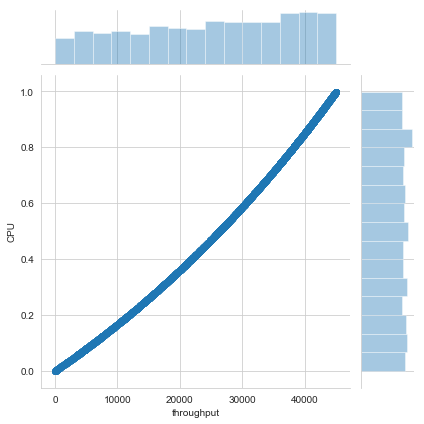

In [30]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


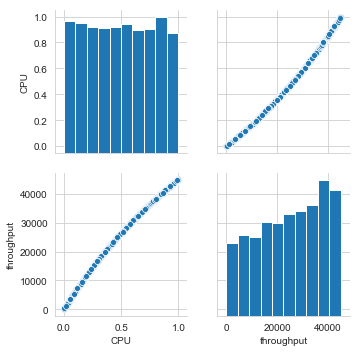

In [31]:
sns.pairplot(data)


In [34]:
data['throughput'].corr(data['CPU'])


0.9961211858456629

In [35]:
datalm = data


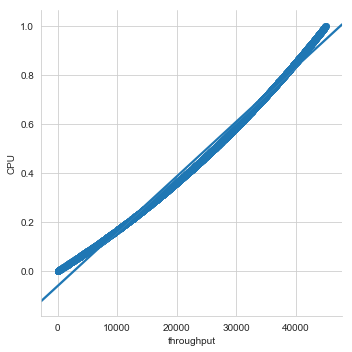

In [37]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [46]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
print(lm.coef_)


[2.24044206e-05]


In [48]:
#Test data prediction
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

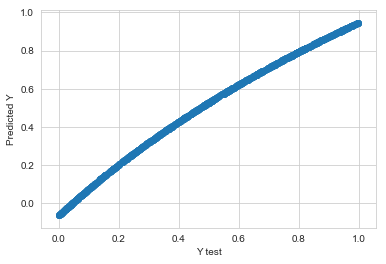

In [49]:
#Plot prediction
plt.scatter(y_test,prediction)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")

In [50]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.022166779626738298
MSE: 0.0006638090065155095
RMSE: 0.02576449119457843


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


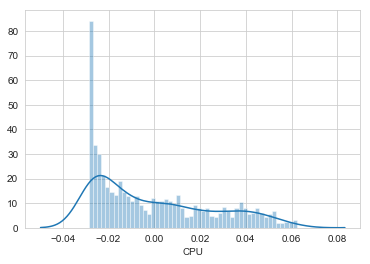

In [43]:
#Residuals
sns.distplot(y_test-prediction,bins=50)